In [5]:
import torch
import torchvision
from torch.utils import data
import os
import numpy as np
import collections
import json
import torch
import imageio
import scipy.misc as m
import scipy.io as io
import matplotlib.pyplot as plt
import glob

from PIL import Image
from tqdm import tqdm
from torchvision import transforms

In [32]:
# Enter the username and password below to get access to cityscapes dataset. Code taken from: https://github.com/cemsaz/city-scapes-script
!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=bhpo00001@stud.uni-saarland.de&password=Nav@1551&submit=Login' https://www.cityscapes-dataset.com/login/

--2021-03-25 08:55:36--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2021-03-25 08:55:36--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html.3’

index.html.3            [ <=>                ]  43.80K  --.-KB/s    in 0.02s   

2021-03-25 08:55:37 (1.93 MB/s) - ‘index.html.3’ saved [44855]



In [33]:
# Download necessary packages from cityscapes dataset
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=1

--2021-03-25 08:55:53--  https://www.cityscapes-dataset.com/file-handling/?packageID=1
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252567705 (241M) [application/octet-stream]
Saving to: ‘gtFine_trainvaltest.zip’

gtFine_trainvaltest 100%[===================>] 240.87M  92.5MB/s    in 2.6s    

2021-03-25 08:55:56 (92.5 MB/s) - ‘gtFine_trainvaltest.zip’ saved [252567705/252567705]



In [34]:
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=3

--2021-03-25 08:56:01--  https://www.cityscapes-dataset.com/file-handling/?packageID=3
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11592327197 (11G) [application/octet-stream]
Saving to: ‘leftImg8bit_trainvaltest.zip’

leftImg8bit_trainva 100%[===================>]  10.80G  96.3MB/s    in 1m 58s  

2021-03-25 08:57:59 (94.0 MB/s) - ‘leftImg8bit_trainvaltest.zip’ saved [11592327197/11592327197]



In [35]:
!unzip leftImg8bit_trainvaltest.zip -d ./cityscapes/

Archive:  leftImg8bit_trainvaltest.zip
 extracting: ./cityscapes/README     
 extracting: ./cityscapes/license.txt  
   creating: ./cityscapes/leftImg8bit/train/
   creating: ./cityscapes/leftImg8bit/train/jena/
 extracting: ./cityscapes/leftImg8bit/train/jena/jena_000078_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/jena/jena_000032_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/jena/jena_000055_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/jena/jena_000067_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/jena/jena_000001_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/jena/jena_000111_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/jena/jena_000114_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/jena/jena_000105_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/jena/jena_000021_000019_leftImg8bit.png  
 extracting: .

 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000135_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000030_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000133_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000172_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000105_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000041_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000014_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000142_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000079_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000081_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/tr

 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000179_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000066_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000034_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000050_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000013_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000045_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000068_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000137_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000086_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/stuttgart/stuttgart_000187_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/tr

 extracting: ./cityscapes/leftImg8bit/train/ulm/ulm_000093_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/ulm/ulm_000018_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/ulm/ulm_000028_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/ulm/ulm_000075_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/ulm/ulm_000044_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/ulm/ulm_000043_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/ulm/ulm_000062_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/ulm/ulm_000059_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/ulm/ulm_000052_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/ulm/ulm_000082_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/ulm/ulm_000053_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/ulm/ulm_000006_000019_leftImg8bi

 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000058_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000031_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000081_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000111_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000149_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000146_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000108_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000202_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000036_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000170_000019_leftImg8bit.png  
 extracting: ./citys

 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000075_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000044_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000071_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000002_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000094_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000093_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000106_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000207_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000016_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000203_000019_leftImg8bit.png  
 extracting: ./citys

 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000138_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000061_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000190_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000182_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000084_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000034_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000045_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000137_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000216_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000181_000019_leftImg8bit.png  
 extracting: ./citys

 extracting: ./cityscapes/leftImg8bit/train/darmstadt/darmstadt_000061_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/darmstadt/darmstadt_000052_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/darmstadt/darmstadt_000032_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/darmstadt/darmstadt_000017_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/darmstadt/darmstadt_000060_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/darmstadt/darmstadt_000069_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/darmstadt/darmstadt_000076_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/darmstadt/darmstadt_000065_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/darmstadt/darmstadt_000063_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/darmstadt/darmstadt_000072_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/tr

 extracting: ./cityscapes/leftImg8bit/train/zurich/zurich_000024_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/zurich/zurich_000112_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/zurich/zurich_000061_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/zurich/zurich_000107_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/zurich/zurich_000009_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/zurich/zurich_000048_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/zurich/zurich_000060_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/zurich/zurich_000075_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/zurich/zurich_000087_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/zurich/zurich_000027_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/zurich/zurich_000104_000019_leftImg8bit.png  
 extractin

 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000014_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000191_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000242_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000029_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000104_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000170_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000285_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000161_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000224_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000067_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000288_000019_leftImg8bit.png  
 extractin

 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000091_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000058_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000203_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000019_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000135_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000040_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000182_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000305_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000300_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000233_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bremen/bremen_000152_000019_leftImg8bit.png  
 extractin

 extracting: ./cityscapes/leftImg8bit/train/bochum/bochum_000000_023648_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bochum/bochum_000000_029203_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bochum/bochum_000000_028297_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bochum/bochum_000000_022210_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bochum/bochum_000000_032169_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bochum/bochum_000000_022414_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bochum/bochum_000000_026056_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bochum/bochum_000000_008448_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bochum/bochum_000000_024524_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bochum/bochum_000000_005537_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/bochum/bochum_000000_015038_leftImg8bit.png  
 extractin

 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_038511_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_057678_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_059720_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_007737_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_068693_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_086499_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_093572_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_000042_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_042885_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_025986_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_077927_leftIm

 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_008494_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_005639_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_047390_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_069177_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_069289_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_044251_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_084865_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_050160_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_090742_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_103541_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hamburg/hamburg_000000_087822_leftIm

 extracting: ./cityscapes/leftImg8bit/train/tubingen/tubingen_000078_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/tubingen/tubingen_000043_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/tubingen/tubingen_000000_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/tubingen/tubingen_000011_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/tubingen/tubingen_000003_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/tubingen/tubingen_000074_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/tubingen/tubingen_000012_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/tubingen/tubingen_000090_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/tubingen/tubingen_000140_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/tubingen/tubingen_000024_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/tubingen/tubinge

 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000166_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000164_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000039_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000067_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000028_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000056_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000026_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000162_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000021_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000148_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000098_000019_leftImg8bit.png  
 extractin

 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000144_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000036_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000108_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000083_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000015_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000004_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000130_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000060_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000107_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000095_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/aachen/aachen_000064_000019_leftImg8bit.png  
 extractin

 extracting: ./cityscapes/leftImg8bit/train/krefeld/krefeld_000000_004447_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/krefeld/krefeld_000000_024276_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/krefeld/krefeld_000000_014673_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/krefeld/krefeld_000000_030111_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/krefeld/krefeld_000000_005503_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/krefeld/krefeld_000000_007325_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/krefeld/krefeld_000000_021222_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/krefeld/krefeld_000000_015494_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/krefeld/krefeld_000000_026269_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/krefeld/krefeld_000000_009574_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/krefeld/krefeld_000000_014886_leftIm

 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_013094_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_036051_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_055800_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_012347_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_056361_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_021337_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_042581_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_032681_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_040221_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_056142_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_035768_leftIm

 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_007780_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_006922_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_004230_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_054276_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_050228_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_034560_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_000381_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_042382_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_011471_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_046398_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/hanover/hanover_000000_030889_leftIm

 extracting: ./cityscapes/leftImg8bit/train/weimar/weimar_000002_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/weimar/weimar_000026_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/weimar/weimar_000004_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/weimar/weimar_000097_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/weimar/weimar_000013_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/weimar/weimar_000132_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/weimar/weimar_000054_000019_leftImg8bit.png  
   creating: ./cityscapes/leftImg8bit/train/strasbourg/
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_015602_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_055934_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_014503_leftImg8bit.png  
 extracting: ./citys

 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_030120_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_060173_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_013944_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_025907_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_003489_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_017159_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_018872_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_000113_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_042434_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_042309_leftImg8bit.png  
 extracting: ./citys

 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_025833_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_036697_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_028628_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_047955_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_032346_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_010640_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_024701_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_025426_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_052050_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_029839_leftImg8bit.png  
 extracting: ./citys

 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_022836_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_053579_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_061384_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_004951_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_008603_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_051134_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_006264_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_033448_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_056857_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_020904_leftImg8bit.png  
 extracting: ./citys

 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_027771_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_005876_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_009110_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_004112_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_035562_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_004260_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_031602_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_008576_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000000_023694_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/strasbourg/strasbourg_000001_044219_leftImg8bit.png  
 extracting: ./citys

 extracting: ./cityscapes/leftImg8bit/train/cologne/cologne_000019_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/cologne/cologne_000039_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/cologne/cologne_000104_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/cologne/cologne_000110_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/cologne/cologne_000060_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/cologne/cologne_000138_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/cologne/cologne_000116_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/cologne/cologne_000013_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/cologne/cologne_000043_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/cologne/cologne_000031_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/cologne/cologne_000088_000019_leftIm

 extracting: ./cityscapes/leftImg8bit/train/erfurt/erfurt_000029_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/erfurt/erfurt_000025_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/erfurt/erfurt_000013_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/erfurt/erfurt_000008_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/erfurt/erfurt_000057_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/erfurt/erfurt_000066_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/erfurt/erfurt_000073_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/erfurt/erfurt_000020_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/erfurt/erfurt_000001_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/erfurt/erfurt_000041_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/erfurt/erfurt_000096_000019_leftImg8bit.png  
 extractin

 extracting: ./cityscapes/leftImg8bit/train/monchengladbach/monchengladbach_000000_009690_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/monchengladbach/monchengladbach_000000_022748_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/monchengladbach/monchengladbach_000000_023856_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/monchengladbach/monchengladbach_000000_021104_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/monchengladbach/monchengladbach_000000_028563_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/monchengladbach/monchengladbach_000000_024637_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/monchengladbach/monchengladbach_000000_019142_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/monchengladbach/monchengladbach_000000_034302_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/train/monchengladbach/monchengladbach_000000_026305_leftImg8bit.png  
 extracting: ./cityscapes/le

 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_060545_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_063045_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_032556_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_064305_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_049698_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_007857_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_012519_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_034816_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_032018_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_060135_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfur

 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_067092_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_054884_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_058914_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_070099_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000000_000294_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_056580_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_032711_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000000_013382_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_010830_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/frankfurt/frankfur

 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000132_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000000_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000092_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000109_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000019_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000020_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000089_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000153_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000152_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000066_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000131_000019_leftImg8bit.png  
 extractin

 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000042_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000104_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000115_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000087_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000098_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000047_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000080_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000107_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000137_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000119_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/val/munster/munster_000088_000019_leftImg8bit.png  
 extractin

 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000244_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000333_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000025_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000132_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000057_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000496_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000045_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000129_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000438_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000349_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000357_000019_leftImg8bit.png  
 extracting: ./citysc

 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000207_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000226_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000458_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000536_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000064_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000292_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000495_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000181_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000036_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000212_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000480_000019_leftImg8bit.png  
 extracting: ./citysc

 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000384_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000288_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000040_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000066_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000373_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000198_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000235_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000301_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000360_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000471_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000065_000019_leftImg8bit.png  
 extracting: ./citysc

 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000467_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000054_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000346_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000038_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000531_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000514_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000483_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000060_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000019_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000497_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000070_000019_leftImg8bit.png  
 extracting: ./citysc

 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000352_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000420_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000287_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000063_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000089_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000018_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000144_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000125_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000447_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000275_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/berlin/berlin_000274_000019_leftImg8bit.png  
 extracting: ./citysc

 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_037736_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_033603_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000000_021524_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_038955_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000000_013437_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_012541_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_032911_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000000_013095_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_002033_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_022125_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000003_016708_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/

 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_031350_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_004823_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_018145_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000000_006263_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000003_003791_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000003_004774_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000000_002353_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_016391_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_038768_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000000_016281_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_027124_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/

 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_000120_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000000_005817_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000000_019439_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000000_014742_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_009152_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_029950_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_011333_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000000_021457_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_046981_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000000_003049_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000003_013983_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/

 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000001_005815_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000000_009751_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/mainz/mainz_000003_016360_leftImg8bit.png  
   creating: ./cityscapes/leftImg8bit/test/bielefeld/
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_038924_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_005741_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_021221_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_016718_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_028550_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_036362_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_058776_leftImg8bit.png  
 extracting: ./citys

 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_028414_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_015301_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_003546_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_028148_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_015411_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_060786_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_045117_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_035223_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_026053_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_051894_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefe

 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_062121_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_006239_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_025061_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_066495_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_002528_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_001705_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_061341_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bielefeld/bielefeld_000000_050021_leftImg8bit.png  
   creating: ./cityscapes/leftImg8bit/test/leverkusen/
 extracting: ./cityscapes/leftImg8bit/test/leverkusen/leverkusen_000051_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/leverkusen/leverkusen_000038_000019_leftImg8b

 extracting: ./cityscapes/leftImg8bit/test/bonn/bonn_000003_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bonn/bonn_000006_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bonn/bonn_000016_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bonn/bonn_000017_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bonn/bonn_000035_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bonn/bonn_000025_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bonn/bonn_000038_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bonn/bonn_000005_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bonn/bonn_000036_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bonn/bonn_000045_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bonn/bonn_000023_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/bonn/bonn_000019_00001

 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000336_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000328_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000355_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000146_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000058_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000365_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000198_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000319_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000068_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000285_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000244_000019_leftImg8bit.png  
 extracting: ./citysc

 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000118_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000078_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000147_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000172_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000280_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000186_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000278_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000210_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000342_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000368_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000219_000019_leftImg8bit.png  
 extracting: ./citysc

 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000175_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000229_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000031_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000297_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000272_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000315_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000153_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000305_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000199_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000009_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000090_000019_leftImg8bit.png  
 extracting: ./citysc

 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000108_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000329_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000340_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000337_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000067_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000317_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000363_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000310_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000226_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000333_000019_leftImg8bit.png  
 extracting: ./cityscapes/leftImg8bit/test/munich/munich_000069_000019_leftImg8bit.png  
 extracting: ./citysc

In [36]:
!unzip gtFine_trainvaltest.zip -d ./cityscapes/

Archive:  gtFine_trainvaltest.zip
replace ./cityscapes/README? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [37]:
!unzip -o gtFine_trainvaltest.zip -d ./cityscapes/

Archive:  gtFine_trainvaltest.zip
  inflating: ./cityscapes/README     
  inflating: ./cityscapes/license.txt  
   creating: ./cityscapes/gtFine/train/
   creating: ./cityscapes/gtFine/train/jena/
  inflating: ./cityscapes/gtFine/train/jena/jena_000020_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000092_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000061_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000104_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000064_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000015_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000041_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000097_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000071_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine

  inflating: ./cityscapes/gtFine/train/jena/jena_000025_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000034_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000116_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000102_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000059_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000022_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000061_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000039_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000017_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000029_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000023_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000000_000019_g

  inflating: ./cityscapes/gtFine/train/jena/jena_000033_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000069_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000093_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000111_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000081_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000082_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000099_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000028_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000062_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000045_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000032_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000107_000

  inflating: ./cityscapes/gtFine/train/jena/jena_000011_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000065_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000016_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000022_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000009_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000070_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000093_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000065_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000021_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000087_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000013_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000030_000019_gtFine_co

  inflating: ./cityscapes/gtFine/train/jena/jena_000003_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000070_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000106_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/jena/jena_000025_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000017_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000008_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000081_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000100_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000087_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000107_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000084_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/jena/jena_000054_000019_gtFine_col

  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000161_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000039_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000101_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000083_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000026_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000120_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000043_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000061_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000159_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000070_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgar

  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000073_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000061_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000160_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000130_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000193_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000116_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000043_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000060_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000078_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000047_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine

  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000180_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000028_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000137_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000073_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000069_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000086_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000075_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000095_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000035_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000062_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgar

  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000077_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000156_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000134_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000008_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000107_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000023_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000000_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000106_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000051_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000026_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttg

  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000050_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000014_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000125_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000052_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000145_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000013_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000046_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000040_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000057_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000083_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttg

  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000004_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000080_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000118_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000005_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000024_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000022_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000167_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000000_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000190_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000001_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttga

  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000165_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000030_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000170_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000154_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000065_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000082_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000159_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000172_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000119_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/stuttgart_000012_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/stuttgart/st

  inflating: ./cityscapes/gtFine/train/ulm/ulm_000023_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000085_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000008_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000057_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000009_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000022_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000024_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000018_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000003_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000038_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000048_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000067_000019_gtFine_polygons.json

  inflating: ./cityscapes/gtFine/train/ulm/ulm_000019_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000091_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000061_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000051_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000007_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000014_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000028_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000090_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000068_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000048_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000085_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/ulm/ulm_000076_000019_gtFine_labe

  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000142_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000138_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000055_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000179_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000109_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000092_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000026_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000194_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000103_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000023_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/trai

  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000016_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000018_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000128_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000008_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000032_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000004_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000197_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000047_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000030_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000069_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFi

  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000220_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000153_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000104_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000120_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000214_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000096_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000068_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000086_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000022_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000118_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train

  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000102_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000053_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000077_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000129_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000209_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000206_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000174_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000214_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000031_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000216_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFin

  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000040_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000015_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000198_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000008_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000205_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000009_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000110_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000022_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000204_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000168_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtF

  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000070_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000180_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000066_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000182_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000138_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000205_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000077_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000108_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000155_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/dusseldorf/dusseldorf_000195_000019_gtFine_labelIds.png  
  inflating: ./citysca

  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000056_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000072_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000018_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000028_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000014_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000014_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000043_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000055_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000065_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000084_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/darmstad

  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000037_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000040_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000016_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000044_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000028_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000068_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000060_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000004_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000075_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000048_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/dar

  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000018_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000040_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000078_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000011_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000046_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000000_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000013_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000008_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000012_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/darmstadt/darmstadt_000024_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/darmstadt

  inflating: ./cityscapes/gtFine/train/zurich/zurich_000069_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000024_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000032_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000006_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000095_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000056_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000079_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000028_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000085_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000048_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000027_000019_gtFine_labelIds.png  
  inflating: ./cit

  inflating: ./cityscapes/gtFine/train/zurich/zurich_000071_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000101_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000093_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000033_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000114_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000023_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000065_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000037_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000054_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000048_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000083_000019_gtFine_polygons.json  
  inflatin

  inflating: ./cityscapes/gtFine/train/zurich/zurich_000065_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000007_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000119_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000099_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000025_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000018_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000117_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000032_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000111_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000105_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000089_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFi

  inflating: ./cityscapes/gtFine/train/zurich/zurich_000021_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000098_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000101_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000076_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000115_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000068_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000026_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000032_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000080_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000075_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/zurich/zurich_000060_000019_gtFine_color.png  
  inflating: ./citys

  inflating: ./cityscapes/gtFine/train/bremen/bremen_000038_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000195_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000230_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000075_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000283_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000004_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000078_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000078_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000292_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000029_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000070_000019_gtFine_instanceIds.png  
  inflating: .

  inflating: ./cityscapes/gtFine/train/bremen/bremen_000235_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000283_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000137_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000069_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000142_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000312_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000133_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000170_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000179_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000078_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000053_000019_gtFine_instanceIds.png  
  infl

  inflating: ./cityscapes/gtFine/train/bremen/bremen_000034_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000138_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000196_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000075_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000304_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000213_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000170_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000125_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000253_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000228_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000072_000019_gtFine_polygons.json  
  inflating: .

  inflating: ./cityscapes/gtFine/train/bremen/bremen_000132_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000088_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000144_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000308_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000204_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000062_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000143_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000220_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000150_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000236_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000225_000019_gtFine_instanceIds.png  
  inflating: .

  inflating: ./cityscapes/gtFine/train/bremen/bremen_000199_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000263_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000002_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000064_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000047_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000010_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000044_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000042_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000019_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000243_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000023_000019_gtFine_labelIds.png  
  inflat

  inflating: ./cityscapes/gtFine/train/bremen/bremen_000231_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000172_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000284_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000009_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000124_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000305_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000036_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000270_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000275_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000230_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000091_000019_gtFine_polygons.json  
  inflating: ./citysc

  inflating: ./cityscapes/gtFine/train/bremen/bremen_000217_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000115_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000065_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000083_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000125_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000002_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000001_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000154_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000064_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000196_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000058_000019_gtFine_instanceIds.png  
  inflating: ./ci

  inflating: ./cityscapes/gtFine/train/bremen/bremen_000179_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000126_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000131_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000058_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000226_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000086_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000154_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000239_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000160_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000096_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000200_000019_gtFine_labelIds.png  
  inflating: 

  inflating: ./cityscapes/gtFine/train/bremen/bremen_000187_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000131_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000291_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000141_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000124_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000069_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000116_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000135_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000271_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000117_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bremen/bremen_000141_000019_gtFine_instanceIds.png  
  inflating: .

  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_027699_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_004748_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_023648_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_003245_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_015038_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_033331_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_030913_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_024717_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_002562_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_033056_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_016591_gtFine_polygons.json  
  inflating: ./city

  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_008804_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_024524_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_007950_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_034936_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_008804_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_030913_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_025746_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_011711_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_015645_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_000313_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_000313_gtFine_labelIds.png  
  inflating: ./ci

  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_001519_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_029721_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_024343_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_010562_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_008448_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_002562_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_020673_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_001828_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_019188_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_010562_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/bochum/bochum_000000_023435_gtFine_instanceIds.png  
  inflatin

   creating: ./cityscapes/gtFine/train/hamburg/
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_044747_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_076966_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_103541_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_052122_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_037741_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_036427_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_104857_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_018592_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_029676_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_047157_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg

  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_078579_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_077756_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_004985_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_018878_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_029676_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_062710_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_094717_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_068916_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_054850_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_069096_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_073999_gtFine_instanceIds.p

  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_038915_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_094185_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_048750_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_036003_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_090742_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_061048_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_037036_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_092476_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_087216_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_098061_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_000042_gtFine_color.png  
  inflati

  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_057816_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_035568_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_020211_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_087216_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_046078_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_027857_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_044251_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_059720_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_067587_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_053886_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_094717_gtFine_color.png  
 

  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_018878_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_048138_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_003904_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_053776_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_062710_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_048960_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_105464_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_103075_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_093572_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_084865_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_020563_gtFine_labelIds.png 

  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_103856_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_074545_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_083696_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_073549_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_071150_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_077756_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_054029_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_014940_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_054029_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_021353_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_046566_gtFine_

  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_033506_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_055039_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_037279_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_047057_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_048138_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_096063_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_065604_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_048494_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_013577_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_047220_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_045437_gtFine_polygons.json

  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_056508_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_019892_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_029676_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_042885_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_002338_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_021961_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_097447_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_070444_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_046566_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_091900_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_002338_gtFine_color.png  

  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_015350_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_106102_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_039546_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_003488_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_069096_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_077642_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_093787_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_088054_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_100300_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_088197_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_073314_gtFine_instanceIds.pn

  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_047220_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_057816_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_028439_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_048750_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hamburg/hamburg_000000_001613_gtFine_instanceIds.png  
   creating: ./cityscapes/gtFine/train/tubingen/
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000074_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000079_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000049_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000023_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000099_000019_gtFine_instanceIds.png  
  inflating: ./city

  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000118_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000116_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000068_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000085_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000112_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000085_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000036_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000096_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000010_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000039_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000091_000019_g

  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000133_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000001_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000087_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000008_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000131_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000104_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000112_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000043_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000098_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000066_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_

  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000097_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000083_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000026_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000007_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000116_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000000_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000074_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000095_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000011_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000098_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/tubingen/tubingen_000104_000019_g

  inflating: ./cityscapes/gtFine/train/aachen/aachen_000114_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000068_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000096_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000139_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000158_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000091_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000129_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000077_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000028_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000126_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000087_000019_gtFine_labelIds.png  
  inflating: ./citys

  inflating: ./cityscapes/gtFine/train/aachen/aachen_000143_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000135_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000028_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000120_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000085_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000095_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000086_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000136_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000046_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000005_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000033_000019_gtFine_polygons.json  
  inflating: 

  inflating: ./cityscapes/gtFine/train/aachen/aachen_000152_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000058_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000025_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000108_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000072_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000051_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000020_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000159_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000032_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000012_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000141_000019_gtFine_labelIds.png  
  inflating

  inflating: ./cityscapes/gtFine/train/aachen/aachen_000153_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000094_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000113_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000045_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000124_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000008_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000124_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000027_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000018_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000034_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000034_000019_gtFine_labelIds.png  
  inflating: 

  inflating: ./cityscapes/gtFine/train/aachen/aachen_000068_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000121_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000083_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000056_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000067_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000087_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000008_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000039_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000093_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000077_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000088_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/g

  inflating: ./cityscapes/gtFine/train/aachen/aachen_000029_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000172_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000157_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000055_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000171_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000061_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000036_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000111_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000098_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000173_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/aachen/aachen_000093_000019_gtFine_labelIds.png  
  inflating: ./cityscape

  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_031257_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_030701_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_035124_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_005503_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_034389_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_016342_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_018514_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_011655_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_031257_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_024604_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_005252_gtFine_lab

  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_027596_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_021553_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_018866_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_017342_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_009404_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_017489_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_012353_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_014886_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_035398_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_017342_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/krefeld/krefeld_000000_014886_gtFine_polygons.json

  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_019938_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_004646_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_039470_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_039021_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_040051_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_027998_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_026743_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_019282_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_008017_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_034560_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_034935_gtFine_polygons.json  
  in

  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_057532_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_003853_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_006922_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_020089_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_009128_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_047870_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_038927_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_025437_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_053604_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_038927_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_034347_gtF

  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_032681_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_014537_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_032559_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_027481_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_047499_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_034347_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_051059_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_030781_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_023614_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_035491_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_028460_gtFine_labelIds.png 

  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_056361_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_029043_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_005599_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_046732_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_006922_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_027007_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_044085_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_046646_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_045004_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_049005_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_042581_gtFine_labelId

  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_019456_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_019456_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_026356_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_043102_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_029455_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_008200_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_013205_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_056142_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_029455_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_053604_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_027390_gtFine_labelIds.png  


  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_051842_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_055124_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_027998_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_000164_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_010553_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_009420_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_012347_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_005732_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_043550_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_051152_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_004646_gtFine_instan

  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_000381_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_040133_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_054276_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_024276_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_052729_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_000164_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_002357_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_025335_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_004230_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_050228_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/hanover/hanover_000000_025437_gtFine_labelIds.png  
  in

  inflating: ./cityscapes/gtFine/train/weimar/weimar_000127_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000037_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000013_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000118_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000029_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000046_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000104_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000008_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000058_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000054_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000020_000019_gtFine_instanceIds.png  
  inflat

  inflating: ./cityscapes/gtFine/train/weimar/weimar_000135_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000080_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000077_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000126_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000061_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000024_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000067_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000011_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000023_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000122_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000035_000019_gtFine_instanceIds.png  
  inflating: ./cityscap

  inflating: ./cityscapes/gtFine/train/weimar/weimar_000131_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000072_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000034_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000017_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000116_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000126_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000013_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000067_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000007_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000098_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000011_000019_gtFine_labelIds.png  
  inflating: ./cit

  inflating: ./cityscapes/gtFine/train/weimar/weimar_000125_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000056_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000049_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000042_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000059_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000108_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000026_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000064_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000087_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000054_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/weimar/weimar_000002_000019_gtFine_labelIds.png  
  inflating

  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_005995_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_029915_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_045135_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_021951_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_059914_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_037906_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_024945_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_058105_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_035562_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_016481_gtFine_polygons.json  
  inflating: ./cityscapes/gtF

  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_057811_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_031582_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_025907_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_030839_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_002081_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_013863_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_033129_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_024152_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_000710_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_029178_gtFine_polygons.json  
  inflating: ./cityscape

  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_030269_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_003991_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_005912_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_000113_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_006264_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_058954_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_021651_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_029481_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_060821_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_004951_gtFine_instanceIds.png  
  inflating: ./citys

  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_018874_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_003846_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_032660_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_037645_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_000065_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_000295_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_034494_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_028240_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_058105_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_014033_gtFine_labelIds.png  
  inflating: ./citysca

  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_026355_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_061685_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_034097_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_011775_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_023271_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_036480_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_031223_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_010372_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_005249_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_033448_gtFine_instanceIds.png  
  inflating: .

  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_013223_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_042309_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_001072_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_042558_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_016481_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_015602_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_043886_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_019355_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_002081_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_036232_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train

  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_025268_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_010755_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_062691_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_012070_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_029980_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_029020_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_006916_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_051661_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_051448_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_042434_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train

  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_025833_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_018616_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_047955_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_030706_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_030539_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_030706_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_013944_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_000751_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_006386_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_055860_gtFine_instanceIds.png  
  inflating: ./c

  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_029179_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_031272_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_034923_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_031116_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_011880_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_014584_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_004248_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_008771_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_010755_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_026998_gtFine_polygons.json  
  inflating: ./cityscap

  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_013223_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_034040_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_005289_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_004983_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_061384_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_024379_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_003846_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_008603_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_032315_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_035008_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine

  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_022151_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_039558_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_052297_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_005219_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_037906_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000000_005249_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_040620_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_055698_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_053222_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/strasbourg/strasbourg_000001_009333_gtFine_polygons.json  
  inflating: ./cityscapes/gtF

  inflating: ./cityscapes/gtFine/train/cologne/cologne_000074_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000035_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000018_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000041_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000140_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000134_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000101_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000071_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000112_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000000_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000050_000019_gtFine_labelId

  inflating: ./cityscapes/gtFine/train/cologne/cologne_000068_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000030_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000051_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000023_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000054_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000001_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000146_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000021_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000058_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000065_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000063_000019_gtFine_instanceIds.png  
 

  inflating: ./cityscapes/gtFine/train/cologne/cologne_000105_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000080_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000102_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000023_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000137_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000127_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000106_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000134_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000120_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000127_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000144_000019_gtFine_polygons.json

  inflating: ./cityscapes/gtFine/train/cologne/cologne_000089_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000139_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000064_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000110_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000017_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000003_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000074_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000054_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000062_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000128_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000008_000019_gtFine_labelIds.png  
  

  inflating: ./cityscapes/gtFine/train/cologne/cologne_000039_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000064_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000036_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000058_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/cologne/cologne_000030_000019_gtFine_labelIds.png  
   creating: ./cityscapes/gtFine/train/erfurt/
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000064_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000024_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000082_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000030_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000088_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/erfurt/er

  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000080_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000073_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000000_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000056_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000027_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000001_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000023_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000015_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000077_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000012_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000012_000019_gtFine_labelIds.png  
  inflating: ./cit

  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000053_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000095_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000059_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000009_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000043_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000042_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000047_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000086_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000100_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000086_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/erfurt/erfurt_000096_000019_gtFine_polygons.json  
  inflating: ./

  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_029240_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_019142_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_026602_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_028883_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_035718_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_000383_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_009615_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_023489_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_009930_gtFine_labelIds.png  
  inflating: ./cityscapes/gtF

  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_024964_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_018575_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_022361_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000001_001531_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_013228_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_015685_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_009191_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_028216_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_026006_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtF

  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_026602_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_034302_gtFine_color.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_026602_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_023856_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_002972_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_023489_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_013228_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_033454_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/train/monchengladbach/monchengladbach_000000_007851_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine

  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_025713_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_000538_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_020693_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_029086_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_067735_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_010600_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_005410_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_075984_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_017476_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_053102_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_

  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_066438_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_068063_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_080091_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_064798_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_080091_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_060135_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_037705_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_001016_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_073464_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_015676_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_01

  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_046126_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_067474_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_012699_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_044658_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_058176_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_032556_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_057954_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_072155_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_005543_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_068208_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt

  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_064651_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_055062_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_065850_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_077092_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_007407_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_006589_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_032942_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_066092_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_007285_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_015328_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_08

  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_050686_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_013496_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_003588_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_011810_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_073243_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_010156_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_010444_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_017476_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_076502_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_007973_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_00

  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_050686_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_014406_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_061682_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_049298_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_073464_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_047178_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_009688_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_062509_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_015091_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_020880_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_00000

  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_030669_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_022797_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_060545_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_077434_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_052120_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_012870_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_041664_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_083852_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_058914_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_013067_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_067474_gtFi

  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_006589_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_049698_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_060906_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_002512_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_049298_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_034047_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_007973_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_009561_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_073464_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_076502_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_047552_g

  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_009561_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_014406_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_040732_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_004859_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_071781_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_041074_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_005410_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_017842_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000_013942_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_066574_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000000

  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_012519_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_012519_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_047552_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_035864_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_072155_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_028590_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_055538_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_066092_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_073088_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_071781_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/frankfurt/frankfurt_000001_073911_gtFi

  inflating: ./cityscapes/gtFine/val/munster/munster_000056_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/munster/munster_000155_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000136_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000099_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000063_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000042_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000069_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000021_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000147_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000109_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/munster/munster_000120_000019_gtFine_labelIds.png  
  inflatin

  inflating: ./cityscapes/gtFine/val/munster/munster_000029_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/munster/munster_000154_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000026_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000008_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000149_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000115_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000005_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000172_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/munster/munster_000006_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000157_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000101_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gt

  inflating: ./cityscapes/gtFine/val/munster/munster_000060_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/munster/munster_000026_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/munster/munster_000167_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000144_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000154_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000114_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000065_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000121_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000066_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/munster/munster_000030_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000149_000019_gtFine_instanceIds.png  
  inflati

  inflating: ./cityscapes/gtFine/val/munster/munster_000091_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/munster/munster_000079_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000044_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000115_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000127_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/munster/munster_000163_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000075_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000111_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000020_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000125_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000004_000019_gtFine_polygons.json  
  inflating:

  inflating: ./cityscapes/gtFine/val/munster/munster_000131_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/munster/munster_000084_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000048_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000061_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/munster/munster_000165_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000136_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000085_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000085_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000150_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000034_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000111_000019_gtFine_polygons.json  
  inflating: ./cit

  inflating: ./cityscapes/gtFine/val/munster/munster_000109_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000158_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000080_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000058_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000138_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000048_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000143_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000004_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000119_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000079_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/munster/munster_000171_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine

  inflating: ./cityscapes/gtFine/val/munster/munster_000002_000019_gtFine_polygons.json  
   creating: ./cityscapes/gtFine/val/lindau/
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000026_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000058_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000038_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000046_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000028_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000035_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000031_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000021_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000019_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000013_000019_gtFine_labelIds.png  

  inflating: ./cityscapes/gtFine/val/lindau/lindau_000027_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000009_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000003_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000017_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000047_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000030_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000053_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000014_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000029_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000050_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/val/lindau/lindau_000033_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/val/

  inflating: ./cityscapes/gtFine/test/berlin/berlin_000535_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000409_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000046_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000501_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000123_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000122_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000350_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000489_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000336_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000133_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000468_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtF

  inflating: ./cityscapes/gtFine/test/berlin/berlin_000379_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000010_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000287_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000095_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000098_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000012_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000257_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000022_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000104_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000340_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000407_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes

  inflating: ./cityscapes/gtFine/test/berlin/berlin_000318_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000459_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000412_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000157_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000233_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000180_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000093_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000296_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000447_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000337_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/berlin/berlin_000131_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine

  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_045782_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_038955_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_014073_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000003_015411_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000000_018249_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_027053_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000003_007024_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000000_021735_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000000_016651_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000000_012737_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000003_010924_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/

  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_010853_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000003_008876_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000003_010772_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_019061_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_008638_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000000_008165_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_025161_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000003_004883_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000000_013960_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_007460_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000000_014742_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000

  inflating: ./cityscapes/gtFine/test/mainz/mainz_000003_010880_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_010853_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_014073_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000000_008645_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_045782_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000003_013348_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_045651_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000000_010417_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_029293_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_043886_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_000001_041172_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/mainz/mainz_0000

  inflating: ./cityscapes/gtFine/test/bielefeld/bielefeld_000000_041142_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/bielefeld/bielefeld_000000_040472_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/bielefeld/bielefeld_000000_018644_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/bielefeld/bielefeld_000000_064583_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/bielefeld/bielefeld_000000_064805_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/bielefeld/bielefeld_000000_003080_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/bielefeld/bielefeld_000000_035223_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/bielefeld/bielefeld_000000_030958_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/bielefeld/bielefeld_000000_026823_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/bielefeld/bielefeld_000000_015587_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/bielefeld/bielefe

  inflating: ./cityscapes/gtFine/test/munich/munich_000261_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000128_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/munich/munich_000146_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000218_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000125_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000227_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000263_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000160_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/munich/munich_000051_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000086_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000073_000019_gtFine_labelIds.png  
  inflating: ./cityscape

  inflating: ./cityscapes/gtFine/test/munich/munich_000025_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000090_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000112_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000261_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/munich/munich_000384_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000006_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000376_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/munich/munich_000094_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000009_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000078_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000155_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFi

  inflating: ./cityscapes/gtFine/test/munich/munich_000220_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000317_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000100_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000199_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000359_000019_gtFine_polygons.json  
  inflating: ./cityscapes/gtFine/test/munich/munich_000256_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000237_000019_gtFine_labelIds.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000295_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000303_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000239_000019_gtFine_color.png  
  inflating: ./cityscapes/gtFine/test/munich/munich_000325_000019_gtFine_instanceIds.png  
  inflating: ./cityscapes/gtFine/t

In [6]:
# Additional Code to find free GPU for ease of use.
def get_freer_gpu():
    os.system('nvidia-smi -q -d Memory |grep -A4 GPU|grep Free >tmp')
    memory_available = [int(x.split()[2]) for x in open('tmp', 'r').readlines()]
    return np.argmax(memory_available)

In [7]:
cuda_no = get_freer_gpu()
torch.cuda.empty_cache()
device = torch.device("cuda:"+str(cuda_no) if torch.cuda.is_available() else "cpu")
display("Executing Code on:",device)

'Executing Code on:'

device(type='cuda', index=1)

In [8]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [9]:
# from PIL import Image

# def removesuffix(content, suffix):
#     if content.endswith(suffix):
#         content = content[:-len(suffix)]
#     return content

# def findFiles(rootDir, suffix):
#     files = []
#     for r, d, f in os.walk(rootDir):
#         for file in f:
#             if suffix in file:
#                 files.append(removesuffix(str(file), suffix))
#     return files

# def substringBefore(string, char):
#     return string[:string.index(char)]

# dataset = "test"

# inputRoot = "./cityscapes/leftImg8bit/" + dataset + "/"
# targetRoot = "./cityscapes/gtFine/" + dataset + "/"
# inputSuffix = '_leftImg8bit.png'
# targetSuffix = '_gtFine_labelIds.png'

# reducedRoot = "./cityscapes/medium/" + dataset + "/"


# os.makedirs(reducedRoot + "input/" )
# os.makedirs(reducedRoot + "target/" )

# files = findFiles(inputRoot, inputSuffix)
# #targetImages = findFiles(inputRoot, targetSuffix)

# i = 0;

# targetSize = (512, 256)

# for file in files:
    
    
#     cityName = substringBefore(file, "_")
    
#     input = Image.open(inputRoot + cityName + "/" + file + inputSuffix)
#     target = Image.open(targetRoot + cityName + "/" + file + targetSuffix)

#     input = input.resize(targetSize)
#     target = target.resize(targetSize, Image.NEAREST)

#     input.save(reducedRoot + "input/" + str(i).zfill(4) +  ".png")
#     target.save(reducedRoot + "target/" + str(i).zfill(4) +  ".png")
    
#     i += 1

In [10]:
root = "./cityscapes/medium/train/"
mapping = [7,8,11,12,13,17,19,20,21,22,23,24,25,26,27,28,31,32,33]
# mapping = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
#mapping = [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]

colors = torch.tensor([
    [  0,  0,  0],
    [111, 74,  0],
    [ 81,  0, 81],
    [128, 64,128],
    [244, 35,232],
    [250,170,160],
    [230,150,140],
    [ 70, 70, 70],
    [102,102,156],
    [190,153,153],
    [180,165,180],
    [150,100,100],
    [150,120, 90],
    [153,153,153],
    [153,153,153],
    [250,170, 30],
    [220,220,  0],
    [107,142, 35],
    [152,251,152],
    [ 70,130,180],
    [220, 20, 60],
    [255,  0,  0],
    [  0,  0,142],
    [  0,  0, 70],
    [  0, 60,100],
    [  0,  0, 90],
    [  0,  0,110],
    [  0, 80,100],
    [  0,  0,230],
    [119, 11, 32],
    [  0,  0,  0]
]) / 255

class cityscapes(data.Dataset):
    def __init__(self):
        self.tf = transforms.Compose(
            [
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ]
        )
        pass
    def __len__(self):
        return 500
    def __getitem__(self, index):
        name = str(index).zfill(4) + ".png"
        input = Image.open(root + "input/" + name )
        target = Image.open(root + "target/" + name )
        
        inputTensor = self.tf(input)
        
        targetTensor = torch.from_numpy(np.array(target)).int()
        
        #targetResultTensor = torch.zeros((len(mapping), 256, 512), dtype=torch.float32)
        
        masks = []

        for i in mapping:
            masks.append(targetTensor == i)
        
        return inputTensor, torch.stack(masks).float()

In [11]:
import torch.nn as nn
import torch
import torch.nn.functional as F
class default_layer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(default_layer, self).__init__()
        self.seq = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3,1,1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.seq(x)  
    
class up_layer(nn.Module):
    def __init__(self,in_channels,out_channels):
        super(up_layer,self).__init__()
        self.upsample = nn.Upsample(scale_factor=2)
        self.layer = default_layer(in_channels, out_channels)
        
    def forward(self,x):
        return self.layer(self.upsample(x))

class recurrent_layer(nn.Module):
    def __init__(self, channels):
        super(recurrent_layer, self).__init__()
        self.layer = default_layer(channels, channels)

    def forward(self, x):
        return self.layer(x + self.layer(x))  
    
class recurrent_block(nn.Module):
    def __init__(self,  in_channels, out_channels):
        super(recurrent_block, self).__init__()
        self.r2c = nn.Sequential(
            recurrent_layer(out_channels),
            recurrent_layer(out_channels)
        )
        self.conv1x1 = nn.Conv2d(in_channels,out_channels,1)
        
    def forward(self, x):
        x = self.conv1x1(x)
        return x + self.r2c(x)
    
class down_block(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(down_block, self).__init__()
        self.r2c = recurrent_block(in_channels,out_channels)
        self.maxpool = nn.MaxPool2d(2,2)

    def forward(self, x):
        x = self.r2c(x)
        return self.maxpool(x), x
    
class up_block(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(up_block, self).__init__()
        self.in_channels = in_channels
        self.up_layer = up_layer(in_channels, out_channels)
        self.r2c = recurrent_block(in_channels,out_channels)

    def forward(self, x, attachment):
        x = self.up_layer(x)
        
        x = torch.cat((attachment,x),dim=1)
        x = self.r2c( x)
        
        return x
    
class R2UNet(nn.Module):
    def __init__(self, classes):
        super(R2UNet, self).__init__()
        
        self.down_rcl1 = down_block(3, 64)
        self.down_rcl2 = down_block(64, 128)
        self.down_rcl3 = down_block(128, 256)
        self.down_rcl4 = down_block(256, 512)
        
        self.down_rcl5 = recurrent_block(512, 1024)
        
        self.up_rcl1 = up_block(1024, 512)
        self.up_rcl2 = up_block(512, 256)
        self.up_rcl3 = up_block(256, 128)
        self.up_rcl4 = up_block(128, 64)
        self.conv1x1 = nn.Conv2d(64,classes,1)

    def forward(self, x):
        x, a = self.down_rcl1(x)
        x, b = self.down_rcl2(x)
        x, c = self.down_rcl3(x)
        x, d = self.down_rcl4(x)
        x = self.down_rcl5(x)
        
        x = self.up_rcl1(x, d)
        x = self.up_rcl2(x, c)
        x = self.up_rcl3(x, b)
        x = self.up_rcl4(x, a)
        x = self.conv1x1(x)
        
        return x

In [12]:
class ASPP(nn.Module):
    def __init__(self, in_channel=512, depth=256):
        super(ASPP,self).__init__()
        # global average pooling : init nn.AdaptiveAvgPool2d ;also forward torch.mean(,,keep_dim=True)
        self.mean = nn.AdaptiveAvgPool2d((1, 1))
        self.conv = nn.Conv2d(in_channel, depth, 1, 1)
        # k=1 s=1 no pad
        self.atrous_block1 = nn.Conv2d(in_channel, depth, 1, 1)
        self.atrous_block6 = nn.Conv2d(in_channel, depth, 3, 1, padding=6, dilation=6)
        self.atrous_block12 = nn.Conv2d(in_channel, depth, 3, 1, padding=12, dilation=12)
        self.atrous_block18 = nn.Conv2d(in_channel, depth, 3, 1, padding=18, dilation=18)
 
        self.conv_1x1_output = nn.Conv2d(depth * 5, depth, 1, 1)
 
    def forward(self, x):
        size = x.shape[2:]
 
        image_features = self.mean(x) #shape: 1 x 3 x 1 x 1
#         print(image_features.shape)
        image_features = self.conv(image_features) 
        image_features = F.upsample(image_features, size=size, mode='bilinear')
 
        atrous_block1 = self.atrous_block1(x)
 
        atrous_block6 = self.atrous_block6(x)
 
        atrous_block12 = self.atrous_block12(x)
 
        atrous_block18 = self.atrous_block18(x)
 
        net = self.conv_1x1_output(torch.cat([image_features, atrous_block1, atrous_block6,
                                              atrous_block12, atrous_block18], dim=1))
        return net

In [15]:
class R2UNetWithASPP(nn.Module):
    def __init__(self,channels,in_channel=512,depth=256):
        super(R2UNetWithASPP,self).__init__()
        self.r2unet = R2UNet(channels)
        self.aspp = ASPP(in_channel = channels,depth = 3)
        self.backbone = torchvision.models.segmentation.deeplabv3_resnet101(num_classes = channels)
    def forward(self,x):
        x = self.backbone(x)['out']
        x = self.aspp(x)
#         print(x.shape)
        x = self.r2unet(x)
        return x

In [16]:
model = R2UNetWithASPP(len(mapping)).to(device)

In [17]:
# loss function
loss_f = nn.MSELoss() # Defining cross entropy loss, for maximising the likelihood of the output
# optimizer variable
opt = torch.optim.Adam(model.parameters()) # Defining simple and most efficient Adam Optimiser as suggested by professor in the lecture 8.
epochs = 100
start = 0
bs = 2

In [18]:
from torchvision.transforms import ToTensor, Lambda

dst = cityscapes()
trainloader = data.DataLoader(dst,shuffle=True,num_workers = 10,batch_size = bs)

In [19]:
print(targets.shape)
print(outputs.shape)


NameError: name 'targets' is not defined

100

In [21]:
# Creating folder structure to store the models after training. 
PATH = "./models/"
model_name = "r2unet_with_aspp_with_backbone"
if not os.path.exists(PATH+model_name):
    os.makedirs(PATH+model_name)
PATH = PATH + model_name +"/"+ model_name+"_"

model.train() # To let know the pre-defined model that we are training the model.
# Uncomment below 3 lines incase of resume training from a given epoch that has already ran.
start = epoch-1
# epochs = 200 # Total number of epoch to be trained at the end.
model.load_state_dict(torch.load(PATH+'epoch-{}.pt'.format(start)))

# with torch.autograd.profiler.profile(use_cuda=True) as prof:
for epoch in range(start,epochs):
    for i, d in enumerate(tqdm(trainloader)):
        inputs,targets = d
        inputs,targets = inputs.to(device),targets.to(device)

        opt.zero_grad()
        outputs = model(inputs)

        loss = loss_f(outputs,targets)
        loss.backward()
        opt.step()
    torch.cuda.empty_cache()
#     if(epoch%10 == 0): # Enable this line and indent the next line to save for every 10 epochs
    torch.save(model.state_dict(), PATH+'epoch-{}.pt'.format(epoch))
    

RuntimeError: CUDA error: out of memory

In [23]:
epoch

68

In [22]:
model

R2UNetWithASPP(
  (r2unet): R2UNet(
    (down_rcl1): down_block(
      (r2c): recurrent_block(
        (r2c): Sequential(
          (0): recurrent_layer(
            (layer): default_layer(
              (seq): Sequential(
                (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): ReLU(inplace=True)
              )
            )
          )
          (1): recurrent_layer(
            (layer): default_layer(
              (seq): Sequential(
                (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): ReLU(inplace=True)
              )
            )
          )
        )
        (conv1x1): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
      )
      (maxpool): MaxPool2d(kernel_size=2, stride=2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Input:


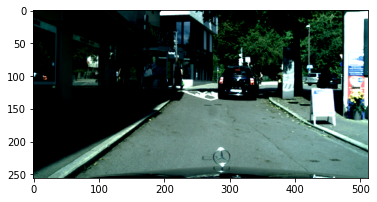

tensor(-4.1419, device='cuda:1', grad_fn=<MinBackward1>)


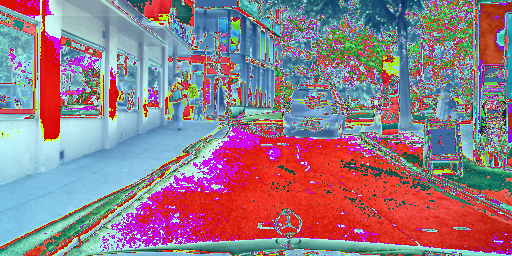

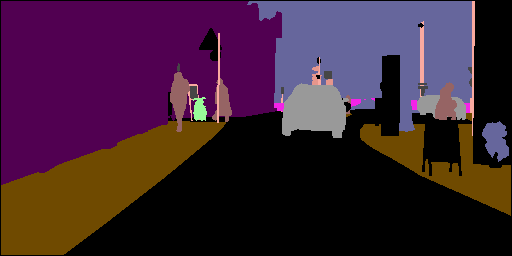

ValueError: pic should be 2/3 dimensional. Got 4 dimensions.

In [26]:
count = 0
for i,d in enumerate(trainloader):
    inputs,targets = d
    inputs,targets = inputs.to(device),targets.to(device)
    outputs = model(inputs)
    
    print("Input:")
    imshow(torchvision.utils.make_grid(inputs[0].cpu()))
    
#     print("Ground Truth:")
#     dst.decode_segmap(targets.squeeze().detach().cpu().numpy(),True)
    
#     print("Predicted:")
#     output_argmax = outputs.squeeze().argmax(0).cpu()
#     dst.decode_segmap(output_argmax.numpy(),True)
    indices = torch.argmax(outputs, 1)
    targetIndices = torch.argmax(targets, 1)
    colorImage = torch.stack([colors[indices, 0 ], colors[indices, 1], colors[indices, 2]], dim=1)
    targetImage = torch.stack([colors[targetIndices, 0 ], colors[targetIndices, 1], colors[targetIndices, 2]], dim=1)

#     clear_output(wait=False)
#     print(i, count)
    print(outputs.min())
    display(transforms.ToPILImage()( inputs[0] ))
    display(transforms.ToPILImage()( targetImage[0] ))
    display(transforms.ToPILImage()( colorImage ))

    if(count>=10):
        break
    count+=1 

torch.Size([2, 3, 256, 512])

19